# Zahra khatibi - 610398119 - Mini Project 1
# Email: Zahrakhatibiiii@gmail.com

## import some libraries

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

## read data from csv

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head(10)

,x1,x2,target
0,0.525642,0.133813,1.0
1,1.009394,0.925323,1.0
2,0.776517,-0.252655,1.0
3,-0.245693,-0.872614,0.0
4,-1.540663,-0.048947,0.0
5,-0.369100,1.772460,0.0
6,-1.780394,0.503660,0.0
7,-0.541349,-0.289898,0.0
8,0.146786,1.057387,0.0
9,-0.968378,0.723859,0.0


In [25]:
def draw_plot(df, text):
    plt.figure(figsize=(8,6))
    for i in range(len(df['x1'])):
        plt.plot(df['x1'][i],train_df['x2'][i], 'o', color =['#DC143C' if df['target'][i]==1 else '#CD950C'][0])
    plt.xlabel("X1", size = 16)
    plt.ylabel("X2", size = 16)
    plt.title(text)

## Plot of data

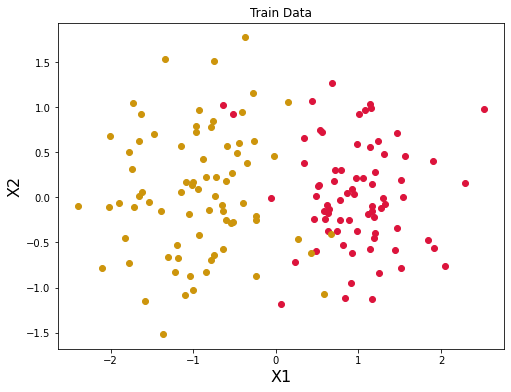

In [26]:
draw_plot(train_df, "Train Data")

## convert target 0 to 1

In [27]:
for i in range(len(train_df['target'])):
    if train_df['target'][i] == 0:
        train_df.loc[i,'target'] = -1
train_df.head()

,x1,x2,target
0,0.525642,0.133813,1.0
1,1.009394,0.925323,1.0
2,0.776517,-0.252655,1.0
3,-0.245693,-0.872614,-1.0
4,-1.540663,-0.048947,-1.0


In [28]:
x_train = train_df[['x1','x2']]
y_train = train_df['target']

In [29]:
for i in range(len(test_df['target'])):
    if test_df['target'][i] == 0:
        test_df.loc[i,'target'] = -1
test_df.head()

,x1,x2,target
0,-0.723805,0.798472,-1.0
1,1.393432,-0.617441,1.0
2,1.018925,0.970799,1.0
3,0.934384,0.568916,1.0
4,1.218155,0.393373,1.0


In [30]:
x_test = test_df[['x1','x2']]
y_test = test_df['target']

# Perceptron based on Pocket Algorithm

In [31]:
def perceptron_pocket(x_data, y_data , number_of_iteration=300, alpha=0.005):
    weights = np.zeros(x_data.shape[1])
    weights = weights.astype('float64')
    bias = 0
    best_bias = bias
    best_weights = weights
    iteration = 0
    mis_classifications = len(y_data)
    best_mis_classifications = mis_classifications
    while (mis_classifications!=0 and iteration < number_of_iteration):      
        mis_classifications = len(y_data)
        for x,y in zip(x_data.to_numpy(),y_data):
            if y != np.sign(x@weights + bias):
                weights += alpha * x * y
                bias += alpha * y
            else:
                mis_classifications -= 1
                
        if mis_classifications < best_mis_classifications:
            best_weights = weights.copy()
            best_bias = bias
            best_mis_classifications = mis_classifications 
                
        iteration +=1 
        
    return best_weights , best_bias

### This Function calculates count of misclassifications data and we use to calculating of Accuracy

In [32]:
def miss_calc(x_test,y_test,weights,bias):
    mis_classifications = len(y_test)
    for x,y in zip(x_test.to_numpy(),y_test):
        if y != np.sign(x@weights + bias):
            pass
        else:
            mis_classifications -= 1
    return mis_classifications

# Run model on Train Data

In [33]:
b_weights , b_bias = perceptron_pocket(x_train, y_train, 1000 , 0.1)

# Plot of Train Data and Separator Line

Count of misclassification data : 7
Accuracy is : 95 %


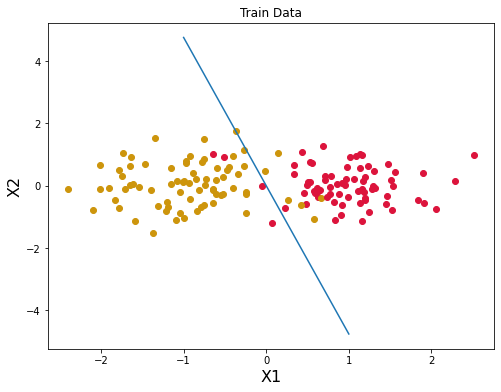

In [34]:
draw_plot(train_df, "Train Data")
y = (b_weights[0] * np.array([-1,1]) + b_bias) / b_weights[1]
plt.plot( np.array([-1,1]) ,y )
err =  miss_calc(x_train,y_train,b_weights,b_bias)
print("Count of misclassification data :" , err)
print("Accuracy is :" , round((len(y_train) - err) / len(y_train) * 100) ,"%")

# Plot of Test Data and Separator Line

Count of misclassification data : 1
Accuracy is : 98 %


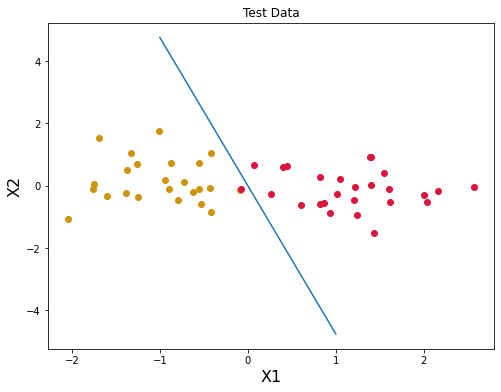

In [35]:
draw_plot(test_df, "Test Data")
y = (b_weights[0] * np.array([-1,1]) + b_bias) / b_weights[1]
plt.plot( np.array([-1,1]) ,y )
err =  miss_calc(x_test,y_test,b_weights,b_bias)
print("Count of misclassification data :" , err)
print("Accuracy is :" , round((len(y_test) - err) / len(y_test) * 100) ,"%" )

# END